# Install libraries

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 36.3 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Vfnkb53NqXOrpJwm8rp6")
project = rf.workspace("fyp-projects-ttk43").project("accident-detection-xymwp")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Detection-1 in yolov8:: 100%|██████████| 17446/17446 [00:03<00:00, 4946.81it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
dataset.location

'/content/Accident-Detection-1'

In [ ]:
DATASET_PATH = dataset.location
print(DATASET_PATH)

/content/Accident-Detection-1


# loading and spliting the data

In [ ]:
import glob
from PIL import Image

train_images = glob.glob(f"{DATASET_PATH}/train/images/*")
valid_images = glob.glob(f"{DATASET_PATH}/valid/images/*")
test_images  = glob.glob(f"{DATASET_PATH}/test/images/*")


# Checking the corrupted images

In [ ]:
def remove_corrupt(images_list):
    clean = []
    for img in images_list:
        try:
            Image.open(img)
            clean.append(img)
        except:
            print("Corrupt:", img)
    return clean

train_images = remove_corrupt(train_images)
valid_images = remove_corrupt(valid_images)
test_images = remove_corrupt(test_images)


In [ ]:
import os
import glob
import shutil
from zipfile import ZipFile

# Checking the missing labels

In [ ]:
def remove_missing_labels(images_list):
    final = []
    for img in images_list:
        label = img.replace("images", "labels").replace(".jpg", ".txt")
        if not label.endswith(".txt"):
            label += ".txt"
        if os.path.exists(label):
            final.append(img)
    return final

train_images = remove_missing_labels(train_images)
valid_images = remove_missing_labels(valid_images)
test_images  = remove_missing_labels(test_images)


# EDA

In [ ]:
import glob

train_imgs = len(glob.glob(f"{dataset.location}/train/images/*"))
valid_imgs = len(glob.glob(f"{dataset.location}/valid/images/*"))
test_imgs  = len(glob.glob(f"{dataset.location}/test/images/*"))

print("Train images:", train_imgs)
print("Validation images:", valid_imgs)
print("Test images:", test_imgs)


Train images: 7027
Validation images: 1059
Test images: 631


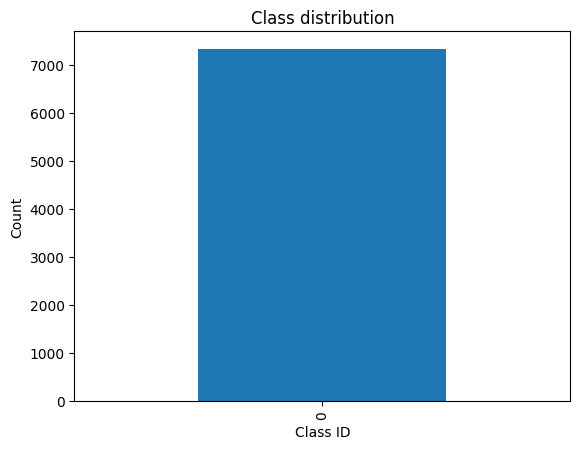

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

labels = glob.glob(f"{DATASET_PATH}/train/labels/*")
classes = []

for lbl in labels:
    with open(lbl) as f:
        lines = f.readlines()
        for line in lines:
            cls = int(line.split()[0])
            classes.append(cls)

pd.Series(classes).value_counts().plot(kind="bar")
plt.title("Class distribution")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()

In [ ]:
import glob
import numpy as np

w_list = []
h_list = []

labels = glob.glob(f"{dataset.location}/train/labels/*.txt")

for file in labels:
    with open(file, "r") as f:
        lines = f.readlines()
        for l in lines:
            _, x, y, w, h = map(float, l.split())
            w_list.append(w)
            h_list.append(h)

print("Average bounding box width:", np.mean(w_list))
print("Average bounding box height:", np.mean(h_list))


Average bounding box width: 0.458079174631349
Average bounding box height: 0.4350540602812671


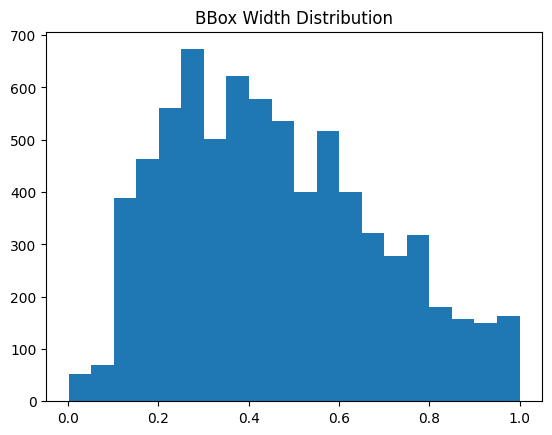

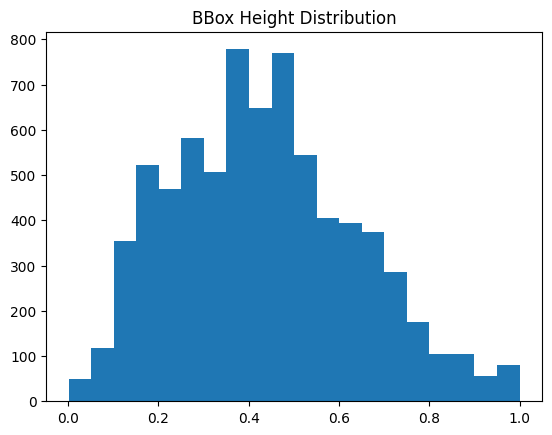

In [ ]:
import matplotlib.pyplot as plt

plt.hist(w_list, bins=20)
plt.title("BBox Width Distribution")
plt.show()

plt.hist(h_list, bins=20)
plt.title("BBox Height Distribution")
plt.show()


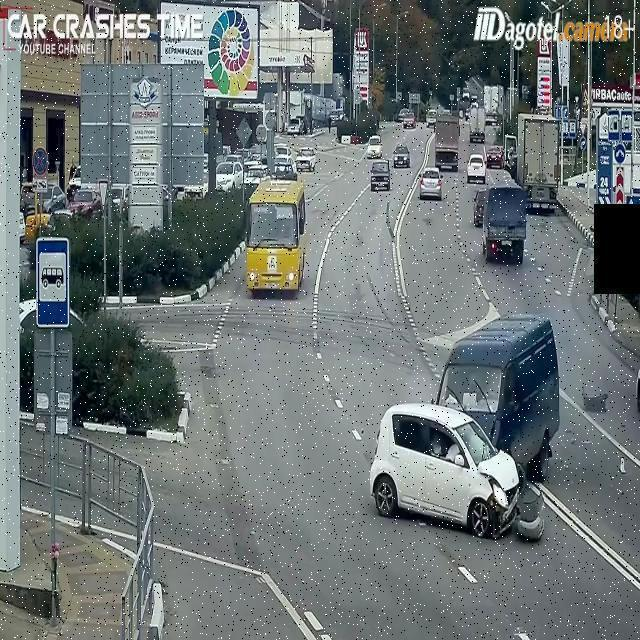

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

sample = glob.glob(f"{dataset.location}/train/images/*")[1551]
img = cv2.imread(sample)
cv2_imshow(img)


# Baseline Model

In [ ]:
!pip install ultralytics --upgrade

from ultralytics import YOLO

model = YOLO("yolo11n.pt")


results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=3,
    imgsz=640
)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (AMD EPYC 7B13)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Accident-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

In [ ]:
val_results = model.val()
val_results


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (AMD EPYC 7B13)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2975.7±854.7 MB/s, size: 74.8 KB)
val: Scanning /content/Accident-Detection-1/valid/labels.cache... 1059 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1059/1059 2.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 67/67 1.2it/s 53.8s
                   all       1059       1108      0.805       0.78      0.861      0.655
Speed: 0.4ms preprocess, 46.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b32c7d628d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!find /content -name "best.pt"

/content/runs/detect/train3/weights/best.pt


In [ ]:
!ls /content/runs/detect/

train  train2  train3  val


In [ ]:
!ls /content/runs/detect/train/

args.yaml   train_batch0.jpg  train_batch2.jpg
labels.jpg  train_batch1.jpg  weights


In [ ]:
!ls /content/runs/detect/train2/

args.yaml   train_batch0.jpg  train_batch2.jpg
labels.jpg  train_batch1.jpg  weights


In [ ]:
!ls /content/runs/detect/train3/

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Accident-898_jpg.rf.1cb02ca8e26ff305c968cdc4c1c1d7c7.jpg to Accident-898_jpg.rf.1cb02ca8e26ff305c968cdc4c1c1d7c7.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Accident-457_jpg.rf.98db3253d88c3f1791aa665e8dcec148.jpg to Accident-457_jpg.rf.98db3253d88c3f1791aa665e8dcec148.jpg


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train3/weights/best.pt")

results = model("Accident-898_jpg.rf.1cb02ca8e26ff305c968cdc4c1c1d7c7.jpg", save=True)


image 1/1 /content/Accident-898_jpg.rf.1cb02ca8e26ff305c968cdc4c1c1d7c7.jpg: 384x640 2 car_accident_dataset - v1 2024-02-16 6-10pms, 70.2ms
Speed: 0.9ms preprocess, 70.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


In [ ]:
results2 = model("Accident-457_jpg.rf.98db3253d88c3f1791aa665e8dcec148.jpg", save=True)


image 1/1 /content/Accident-457_jpg.rf.98db3253d88c3f1791aa665e8dcec148.jpg: 384x640 1 car_accident_dataset - v1 2024-02-16 6-10pm, 28.6ms
Speed: 1.0ms preprocess, 28.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


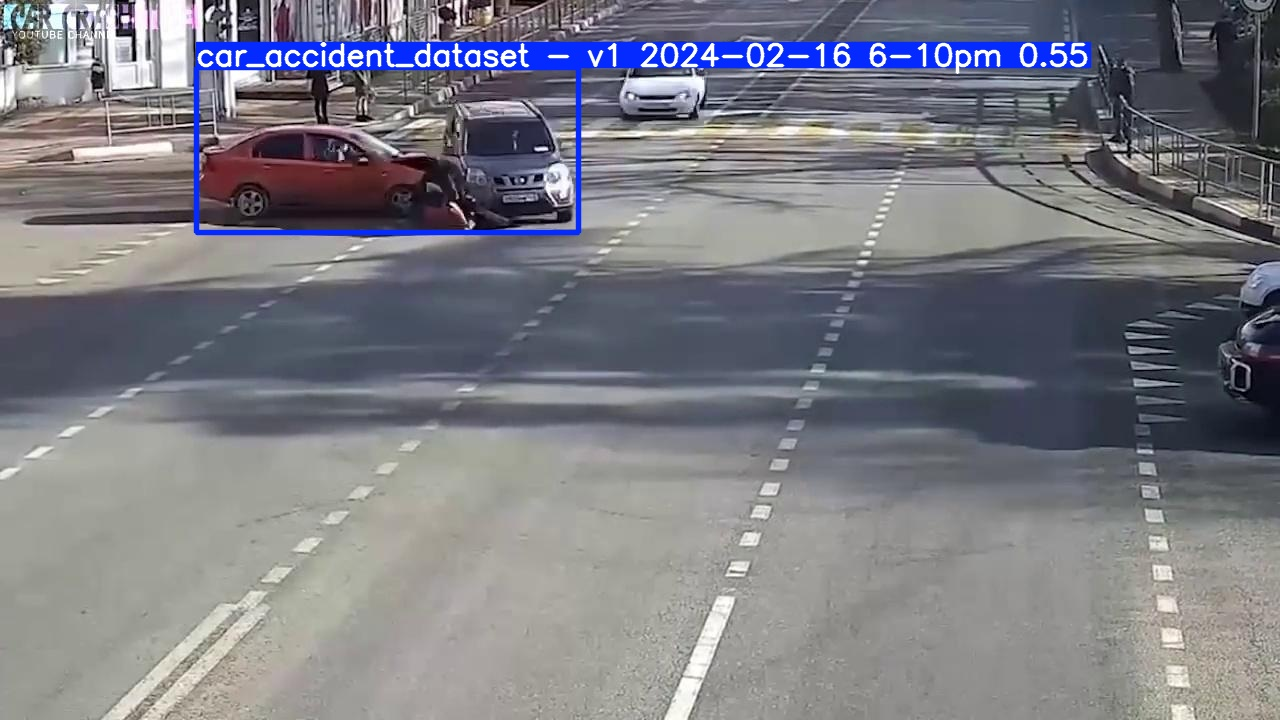

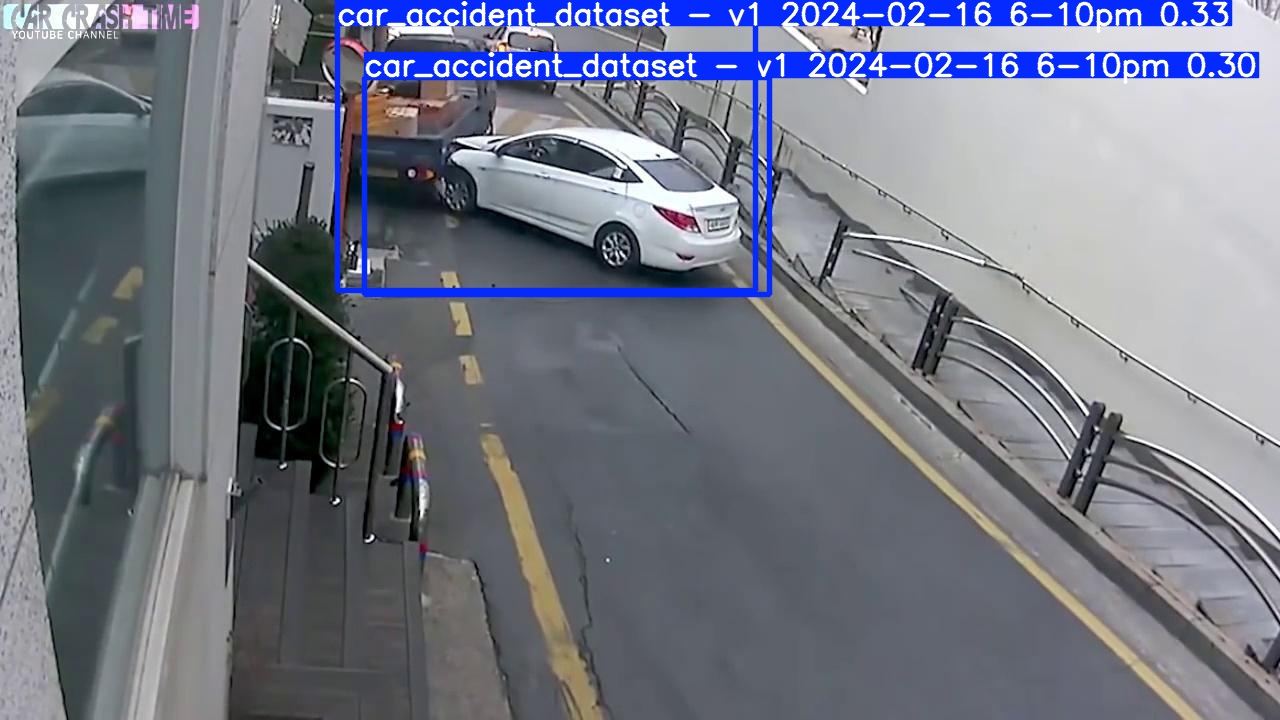

In [ ]:
from IPython.display import Image, display
import os

predict_folder = "/content/runs/detect/predict"

images = [f for f in os.listdir(predict_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

for img_name in images:
    display(Image(filename=os.path.join(predict_folder, img_name)))
